In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,r2_score,plot_roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [289]:
data=pd.read_csv('C:\Data Scientist Internship Projects\loan_prediction.csv')

In [290]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [291]:
## there is no null  data in any row
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [292]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [293]:
data=data.drop(columns='Loan_ID',axis=1)
## No Use of Loan ID

In [294]:
data['Gender'].value_counts()

## more males than females

Male      489
Female    112
Name: Gender, dtype: int64

In [295]:
## Fill all null values

data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [296]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)

In [297]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [298]:
data['Married'].fillna(data['Married'].mode()[0],inplace=True)

In [299]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [300]:
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)

In [301]:
data['Credit_History'].value_counts()
## most people already have credit history

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [302]:
data['Education'].value_counts()
## Mostly People are graduate

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [303]:
data['Loan_Status'].value_counts()
## data shows mostly people loan application is approved

Y    422
N    192
Name: Loan_Status, dtype: int64

In [304]:
data['Loan_Status']=data['Loan_Status'].replace({'Y':1,'N':0})

##Replace Values of Dependent Variable 

In [305]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [306]:
data.isnull().sum()

## Successfully remove all null values

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [307]:
data['Dependents']=labelencoder.fit_transform(data['Dependents'])

In [308]:
data['Education']=labelencoder.fit_transform(data['Education'])

In [321]:
data['Gender']=labelencoder.fit_transform(data['Gender'])

In [310]:
data['Self_Employed']=labelencoder.fit_transform(data['Self_Employed'])

In [323]:
data['Married']=labelencoder.fit_transform(data['Married'])

In [311]:
data['Property_Area']=labelencoder.fit_transform(data['Property_Area'])

In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(5), int64(3)
memory usage: 45.7 KB


In [325]:
x=data.drop(columns='Loan_Status',axis=1)
y=data[['Loan_Status']]

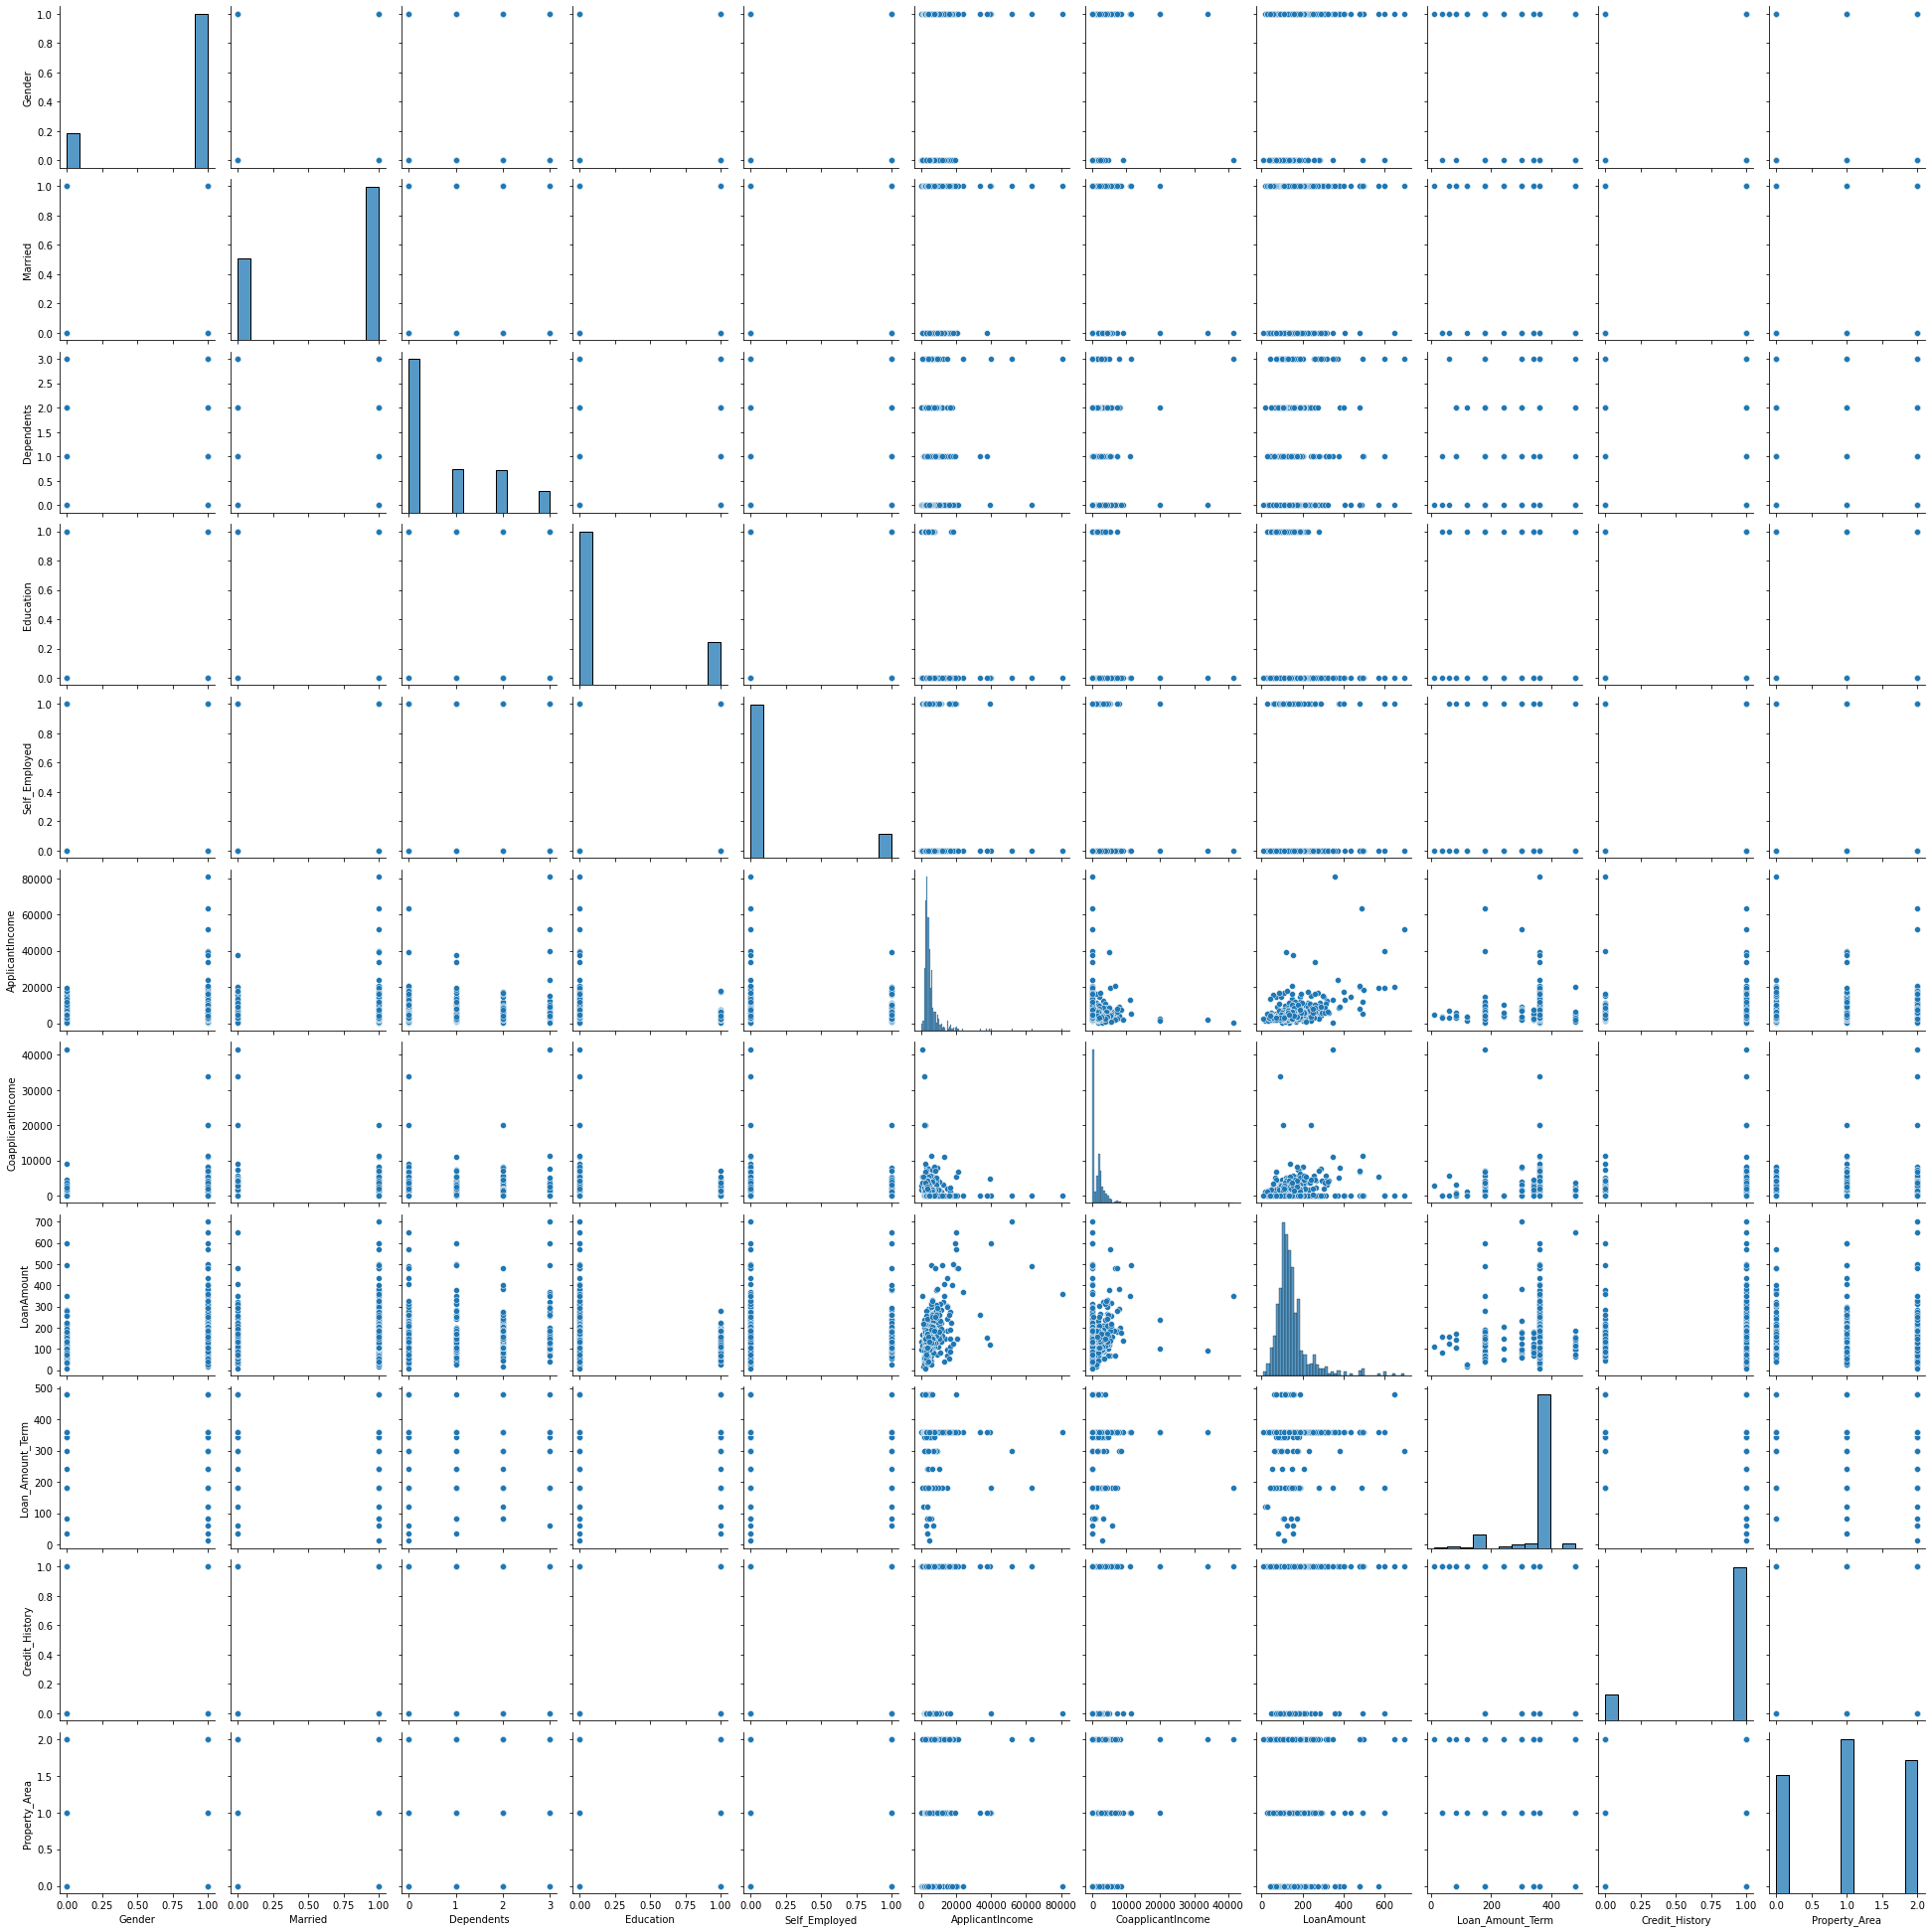

In [326]:
sns.pairplot(x)

In [328]:
x.skew()
#skewness shows normal distribution(-0.5,0.5)
## There are outliers 

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
dtype: float64

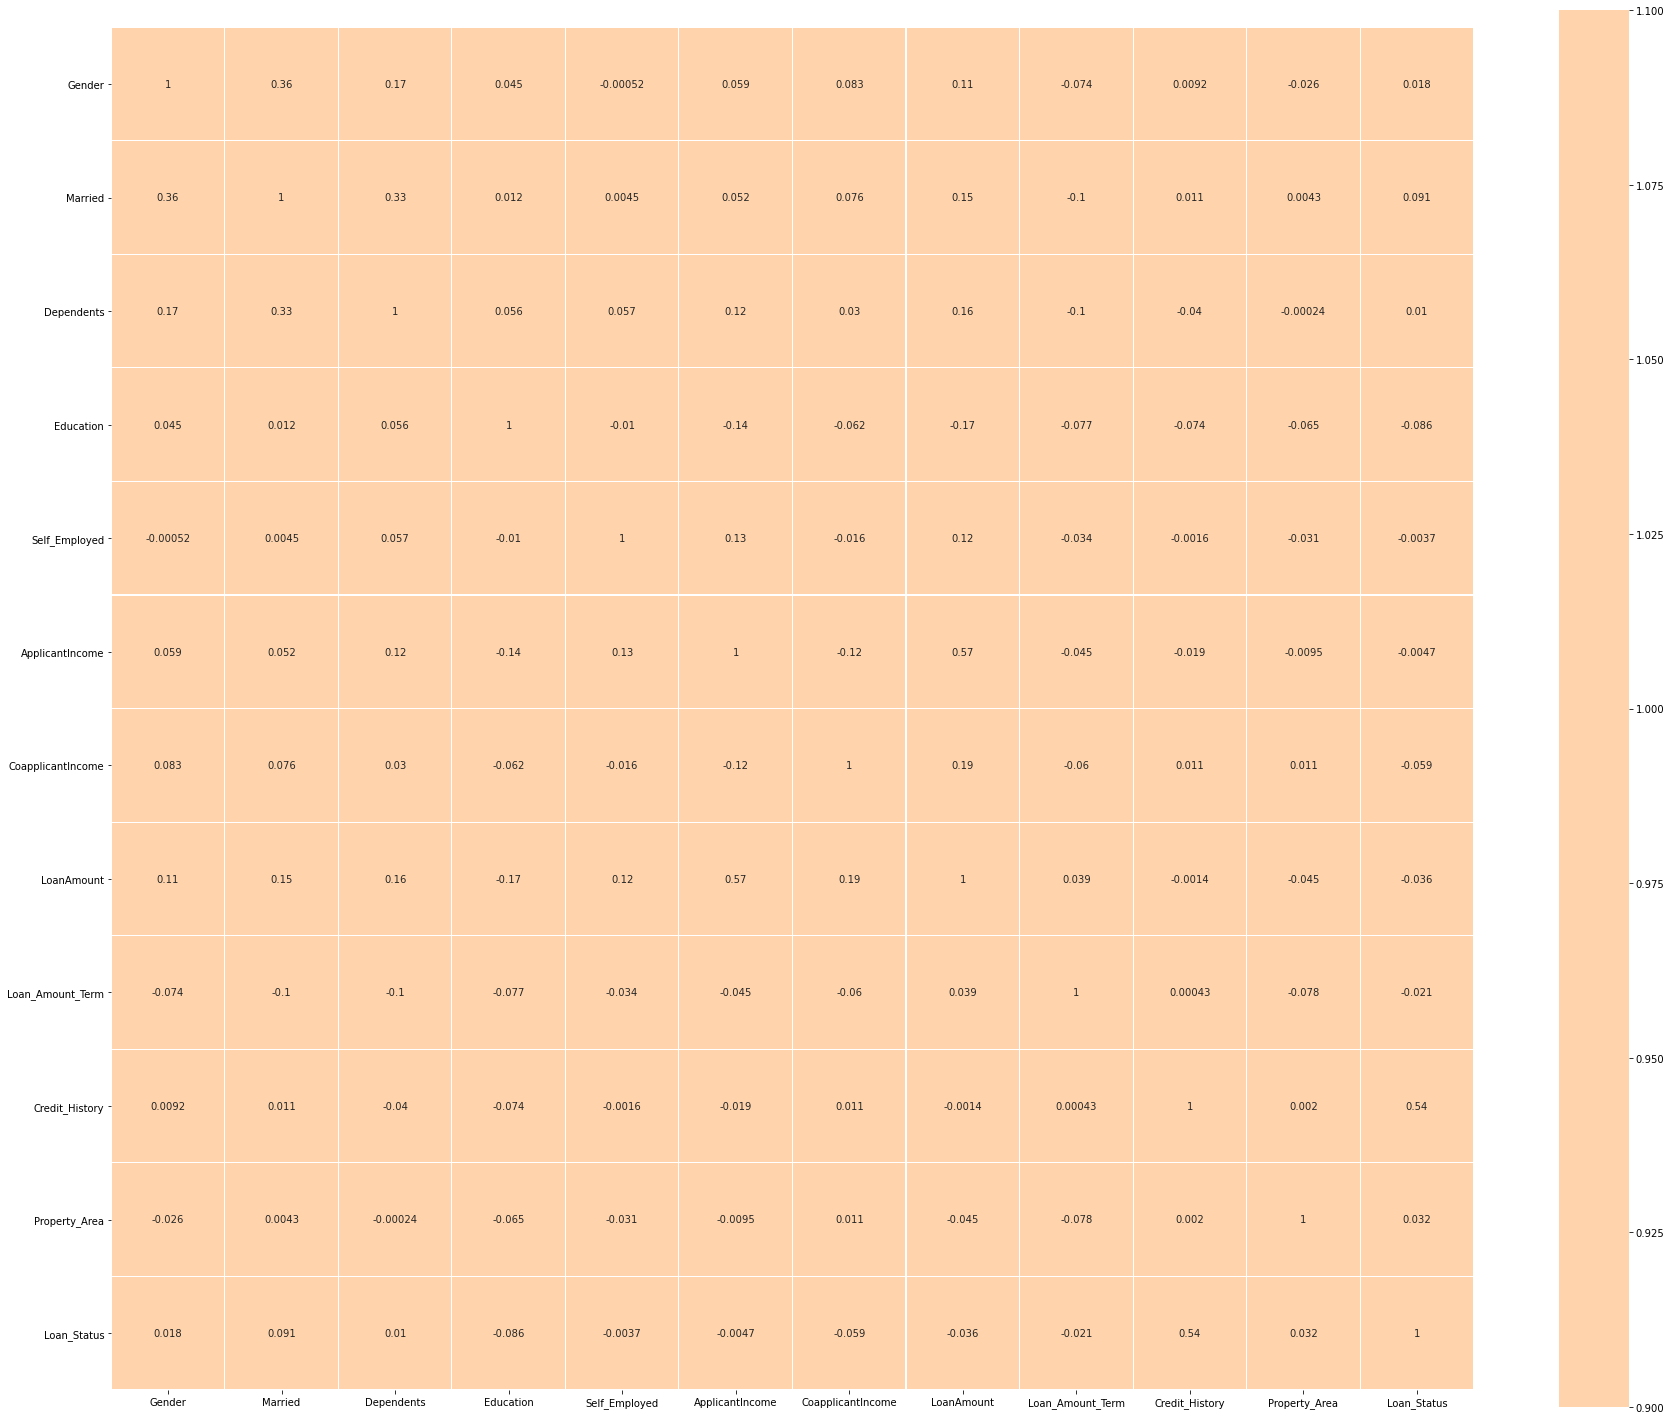

In [330]:
##plotting heatmap for checking correlation
data_corr=data.corr()
plt.figure(figsize=(25,20))
sns.heatmap(data_corr,vmin=1,vmax=1,annot=True,square=True,center=0,fmt='0.2g',linewidths=.1)
plt.tight_layout()

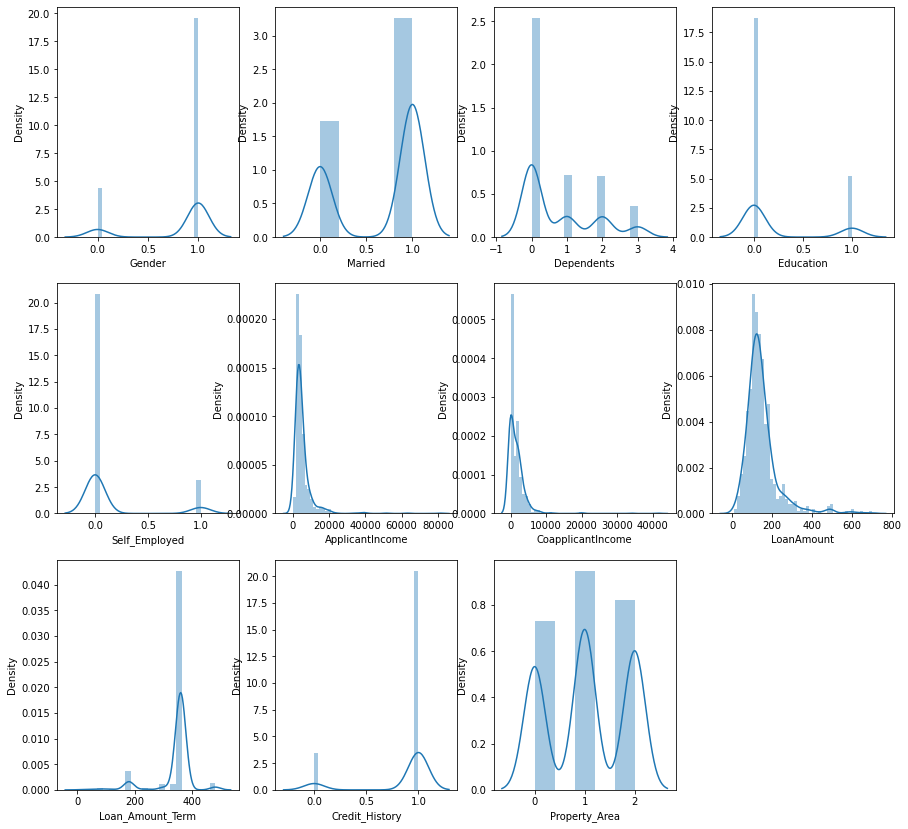

In [332]:
plt.figure(figsize=(15,50))
plotnumber=1
for column in x:
    if plotnumber<=11:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

## Below Figure Show Skewness not proper
## There Must be outliers

In [283]:
## Log Transformation First i used this , but i think not so useful

#data['ApplicantIncome']=np.log(data['ApplicantIncome'])
#data['CoapplicantIncome']=np.log(data['CoapplicantIncome'])
#data['LoanAmount']=np.log(data['LoanAmount'])
#data['Loan_Amount_Term']=np.log(data['Loan_Amount_Term'])
#data['Credit_History']=np.log(data['Credit_History'])

In [342]:
## Removing Outliers:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data['ApplicantIncome']))
z.shape

(614,)

In [343]:
threshold=3
print(np.where(z>3))

(array([126, 155, 171, 183, 185, 333, 409, 443], dtype=int64),)


In [344]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data['CoapplicantIncome']))
z.shape

(614,)

In [345]:
threshold=3
print(np.where(z>3))

(array([  9, 177, 402, 417, 581, 600], dtype=int64),)


In [346]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data['LoanAmount']))
z.shape

(614,)

In [347]:
threshold=3
print(np.where(z>3))

(array([130, 155, 171, 177, 278, 308, 333, 369, 432, 487, 506, 523, 525,
       561, 604], dtype=int64),)


In [348]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data['Loan_Amount_Term']))
z.shape

(614,)

In [349]:
threshold=3
print(np.where(z>3))

(array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585],
      dtype=int64),)


In [350]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data['Credit_History']))
z.shape

(614,)

In [351]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64),)


In [352]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


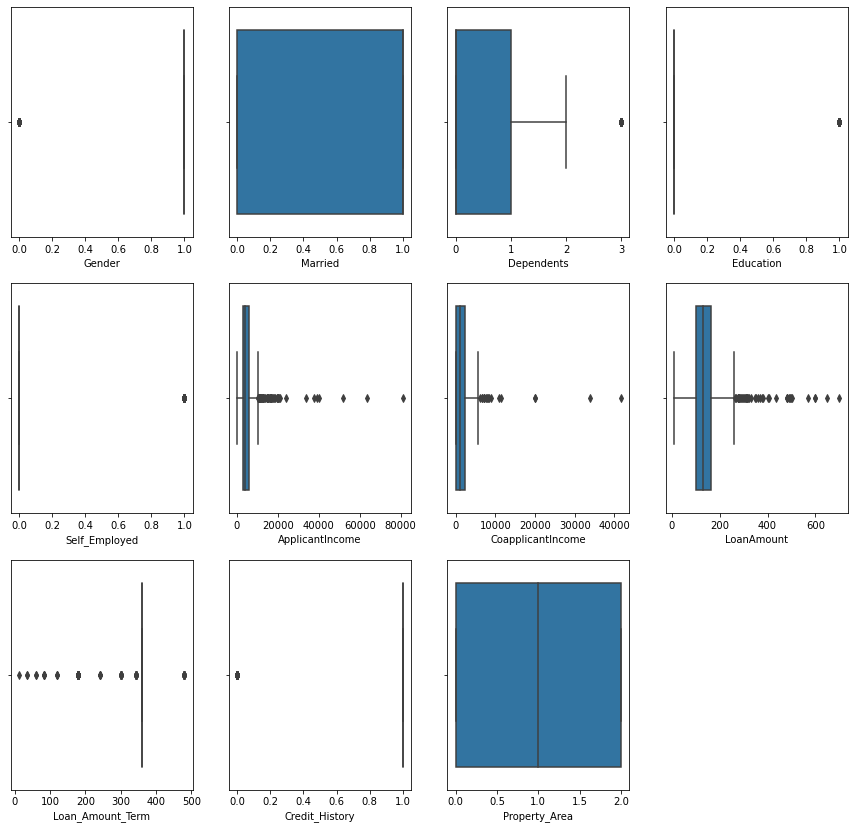

In [354]:
plt.figure(figsize=(15,50))
graph=1
for column in x:
    if graph<=11:
        ax=plt.subplot(10,4,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

## Figure shows the outliers

In [361]:
from scipy.stats import zscore
z_score= zscore(data[['ApplicantIncome','Credit_History','Loan_Amount_Term','LoanAmount','CoapplicantIncome']])
abs_z_score= np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
datanew=data[filtering_entry]
datanew.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,0.801980,0.633663,0.691089,0.223762,0.116832,4220.362376,1304.037861,131.735483,360.689109,0.857426,1.009901,0.693069
std,0.398902,0.482281,0.981788,0.417178,0.321538,2123.614861,1418.288105,48.715982,24.377007,0.349985,0.777856,0.461678
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,240.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2755.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3667.000000,1250.000000,126.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5116.000000,2167.000000,158.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,13262.000000,6250.000000,296.000000,480.000000,1.000000,2.000000,1.000000


In [362]:
x1=datanew.drop(columns='Loan_Status',axis=1)
y1=datanew[['Loan_Status']]

In [365]:
scalar=StandardScaler()
X1=scalar.fit_transform(x1)
X1

array([[ 0.49690399, -1.3151919 , -0.70460636, ..., -0.02829684,
         0.4077766 ,  1.27411798],
       [ 0.49690399,  0.76034532,  0.31495298, ..., -0.02829684,
         0.4077766 , -1.29960034],
       [ 0.49690399,  0.76034532, -0.70460636, ..., -0.02829684,
         0.4077766 ,  1.27411798],
       ...,
       [ 0.49690399,  0.76034532,  0.31495298, ..., -0.02829684,
         0.4077766 ,  1.27411798],
       [ 0.49690399,  0.76034532,  1.33451233, ..., -0.02829684,
         0.4077766 ,  1.27411798],
       [-2.01246118, -1.3151919 , -0.70460636, ..., -0.02829684,
        -2.45232316, -0.01274118]])

In [366]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X1,i) for i in range(X1.shape[1])]
vif['features']=x1.columns
vif

,vif,features
0,1.208114,Gender
1,1.386708,Married
2,1.180425,Dependents
3,1.067196,Education
4,1.045353,Self_Employed
5,1.884153,ApplicantIncome
6,1.565854,CoapplicantIncome
7,1.791018,LoanAmount
8,1.021678,Loan_Amount_Term
9,1.010781,Credit_History


In [391]:
x_train,x_test,y_train,y_test=train_test_split(X1,y1,test_size=0.20,random_state=51)

In [387]:
x_train.shape, x_test.shape

((404, 11), (101, 11))

In [431]:
Regression=LogisticRegression()
Regression.fit(x_train,y_train)

LogisticRegression()

In [432]:
Regression.score(x_train,y_train)

0.8267326732673267

In [433]:
Regression.score(x_test,y_test)

0.7920792079207921

In [375]:
## Regression is giving a 79% accuracy

In [392]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [394]:
cfm= confusion_matrix(y_test,y_pred)
cfm
## Type I is high and Type II Errors are not high
#out of 101 there are 23 false predictions
##Gives 77% Accuracy

array([[12, 20],
       [ 3, 66]], dtype=int64)

In [395]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.80      0.38      0.51        32
           1       0.77      0.96      0.85        69

    accuracy                           0.77       101
   macro avg       0.78      0.67      0.68       101
weighted avg       0.78      0.77      0.74       101



In [415]:
## Cross Validation to check overfitting
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(),X1,y1,cv=5)
cross_val_score(knn,X1,y1,cv=5).mean()
## There is not overfitting

0.7821782178217822

In [411]:
## Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV

In [503]:
param_grid={'algorithm':['kd tree','brute']}

In [500]:
## I am not getting parameters for leaf size and n_neigbors

In [504]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [505]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(algorithm='brute'),
             param_grid={'algorithm': ['kd tree', 'brute']})

In [506]:
gridsearch.best_params_

{'algorithm': 'brute'}

In [507]:
knn=KNeighborsClassifier(algorithm='brute')

In [508]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute')

In [509]:
y_pred=knn.predict(x_test)

In [510]:
cfm= confusion_matrix(y_test,y_pred)
cfm

array([[12, 20],
       [ 3, 66]], dtype=int64)

In [429]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.80      0.38      0.51        32
           1       0.77      0.96      0.85        69

    accuracy                           0.77       101
   macro avg       0.78      0.67      0.68       101
weighted avg       0.78      0.77      0.74       101



In [434]:
## No Improvement after best Search same accuracy

In [449]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
lr=LogisticRegression()
kn=KNeighborsClassifier()

In [450]:
## Training with These Classifiers
dt.fit(x_train,y_train)
lr.fit(x_train,y_train)

LogisticRegression()

In [451]:
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [458]:
## Check The Scores
dt.score(x_test,y_test)

0.6831683168316832

In [457]:
rf.score(x_test,y_test)

0.7722772277227723

In [456]:
lr.score(x_test,y_test)

0.7920792079207921

In [459]:
kn.score(x_test,y_test)

0.7722772277227723

In [460]:
## ROC AUC Curve Scoring

In [461]:
roc_auc_score(y_test,rf.predict(x_test))

0.6741394927536232

In [462]:
roc_auc_score(y_test,lr.predict(x_test))

0.671875

In [463]:
roc_auc_score(y_test,kn.predict(x_test))

0.6657608695652174

In [464]:
roc_auc_score(y_test,dt.predict(x_test))

0.6173007246376812

In [465]:
### roc_auc_scores are showing that random forest method is best

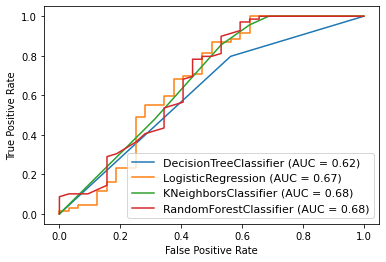

In [471]:
disp =plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [ ]:
## as given above Random Forest Classifier is best for above Data Set

## HYPER PARAMETER TUNING FOR RANDOM FOREST CLASSIFIER

In [495]:
CLF=RandomForestClassifier()
params={'estimator__n_estimators':[13,15],'estimator__criterion':['entropy'],'estimator__max_depth':[10],'estimator__min_samples_split':[10,11],'estimator__min_samples_leaf':[5,6]}

In [496]:
grd=GridSearchCV(CLF,param_grid=params)

In [497]:
grd.fit(x_train,y_train)

ValueError: Invalid parameter estimator for estimator RandomForestClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

In [482]:
## for obtaining parameters
for param in grd.get_params().keys():
    print(param)

cv
error_score
estimator__bootstrap
estimator__ccp_alpha
estimator__class_weight
estimator__criterion
estimator__max_depth
estimator__max_features
estimator__max_leaf_nodes
estimator__max_samples
estimator__min_impurity_decrease
estimator__min_impurity_split
estimator__min_samples_leaf
estimator__min_samples_split
estimator__min_weight_fraction_leaf
estimator__n_estimators
estimator__n_jobs
estimator__oob_score
estimator__random_state
estimator__verbose
estimator__warm_start
estimator
iid
n_jobs
param_grid
pre_dispatch
refit
return_train_score
scoring
verbose


In [498]:
## for obtaining parameters
for param in gridsearch.get_params().keys():
    print(param)

cv
error_score
estimator__algorithm
estimator__leaf_size
estimator__metric
estimator__metric_params
estimator__n_jobs
estimator__n_neighbors
estimator__p
estimator__weights
estimator
iid
n_jobs
param_grid
pre_dispatch
refit
return_train_score
scoring
verbose
